In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Cargar el dataset desde un archivo CSV
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\car data.csv')


In [5]:
# 3. Análisis exploratorio de los datos
# Mostrar las primeras filas del dataset
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [7]:
# Describir el dataset
print(data.describe(include='all'))  # Incluir columnas no numéricas

       Car_Name         Year  Selling_Price  Present_Price     Kms_Driven  \
count       301   301.000000     301.000000     301.000000     301.000000   
unique       98          NaN            NaN            NaN            NaN   
top        city          NaN            NaN            NaN            NaN   
freq         26          NaN            NaN            NaN            NaN   
mean        NaN  2013.627907       4.661296       7.628472   36947.205980   
std         NaN     2.891554       5.082812       8.644115   38886.883882   
min         NaN  2003.000000       0.100000       0.320000     500.000000   
25%         NaN  2012.000000       0.900000       1.200000   15000.000000   
50%         NaN  2014.000000       3.600000       6.400000   32000.000000   
75%         NaN  2016.000000       6.000000       9.900000   48767.000000   
max         NaN  2018.000000      35.000000      92.600000  500000.000000   

       Fuel_Type Seller_Type Transmission       Owner  
count        301   

In [9]:
# Comprobar valores faltantes
print(data.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [11]:
# Limpiar los datos y tratar valores faltantes (si es necesario)
data = data.dropna()  # O puedes usar otras técnicas de imputación


In [13]:
# Convertir variables categóricas a numéricas si es necesario
data = pd.get_dummies(data, drop_first=True)


In [15]:
# Calcular IQR para detectar valores atípicos en la columna 'Selling_Price'
Q1 = data['Selling_Price'].quantile(0.25)
Q3 = data['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

In [12]:

# Cargar el dataset
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\car data.csv')
print("Dataset cargado exitosamente.")


Dataset cargado exitosamente.


In [14]:
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [16]:
# Calcular Q1, Q3 e IQR para la columna 'Selling_Price'
Q1 = data['Selling_Price'].quantile(0.25)
Q3 = data['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los valores atípicos en 'Selling_Price'
data_no_outliers = data[(data['Selling_Price'] >= lower_bound) & (data['Selling_Price'] <= upper_bound)]
print(f"Número de filas después de eliminar valores atípicos: {data_no_outliers.shape[0]}")

Número de filas después de eliminar valores atípicos: 284


In [18]:
# Convertir variables categóricas a variables dummy
data_no_outliers = pd.get_dummies(data_no_outliers, drop_first=True)

In [22]:

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características (X) y la variable objetivo (y)
X = data_no_outliers.drop('Selling_Price', axis=1)
y = data_no_outliers['Selling_Price']

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba y evaluar
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 2.6887026063270114
R²: 0.7137107375043242


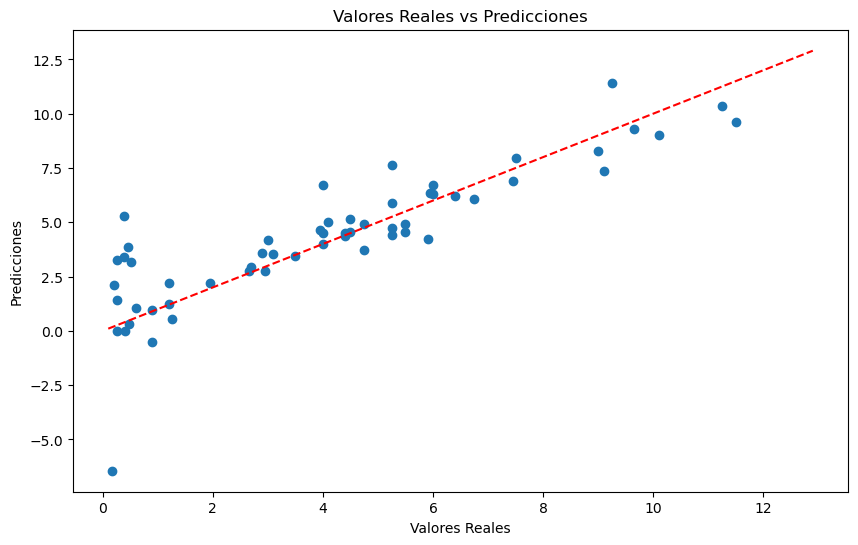

In [24]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


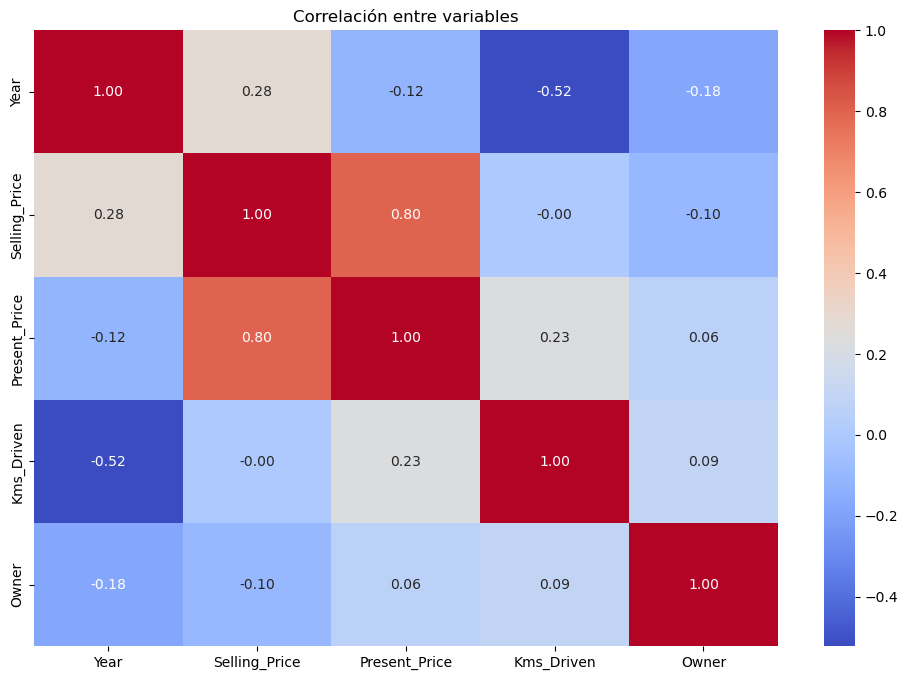

In [26]:
import seaborn as sns

# Filtrar solo las columnas numéricas
numeric_data = data_no_outliers.select_dtypes(include=['float64', 'int64'])

# Crear el heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()

Límite Inferior: 6423.711325541861
Límite Superior: 34042.39202803409


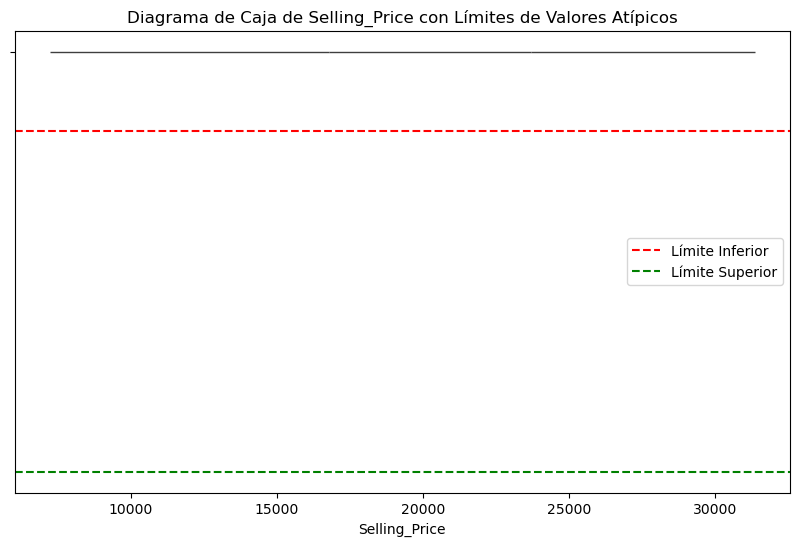

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame
# 
np.random.seed(0)
data = pd.DataFrame({
    'Selling_Price': np.random.normal(loc=20000, scale=5000, size=100)
})

# Calcular Q1, Q3 e IQR para la columna 'Selling_Price'
Q1 = data['Selling_Price'].quantile(0.25)
Q3 = data['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límite Inferior: {lower_bound}")
print(f"Límite Superior: {upper_bound}")

# Graficar el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Selling_Price'])

# Añadir líneas para los límites
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Límite Superior')

plt.title('Diagrama de Caja de Selling_Price con Límites de Valores Atípicos')
plt.legend()
plt.show()



In [9]:
# Definir límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
# Filtrar los valores atípicos
data_no_outliers = data[(data['Selling_Price'] >= lower_bound) & (data['Selling_Price'] <= upper_bound)]
print(f"Número de filas después de eliminar valores atípicos: {data_no_outliers.shape[0]}")


Número de filas después de eliminar valores atípicos: 284


In [21]:
# Verificar valores nulos nuevamente
print(data_no_outliers.isnull().sum())

Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
                         ..
Car_Name_xcent            0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
Length: 106, dtype: int64


In [23]:
# Opciones para tratar valores nulos
data_no_outliers.fillna(data_no_outliers.mean(), inplace=True)  # Imputar con la media

C:\Users\DELL\AppData\Local\Temp\ipykernel_4540\3363714296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.fillna(data_no_outliers.mean(), inplace=True)  # Imputar con la media


In [25]:
# Separar las características (X) y la variable objetivo (y)
X = data_no_outliers.drop('Selling_Price', axis=1)
y = data_no_outliers['Selling_Price']


In [27]:
# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Import the required libraries
from sklearn.linear_model import LinearRegression
from IPython.display import display

# Create and display the Linear Regression model
model = LinearRegression()
display(model)


LinearRegression()

In [31]:
# Predecir y evaluar
y_pred = model.predict(X_test)


In [35]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 2.6887026063165296
R²: 0.7137107375054403


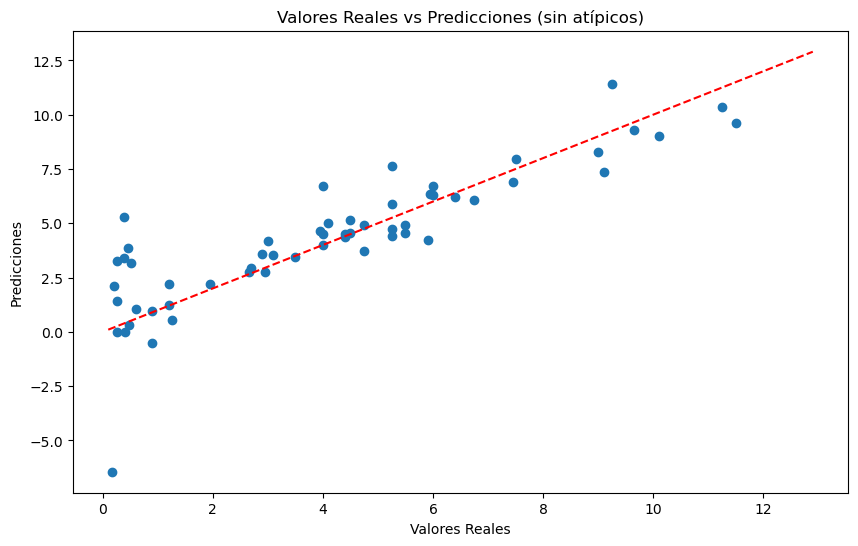

In [41]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones (sin atípicos)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

In [46]:

# Filtrar las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

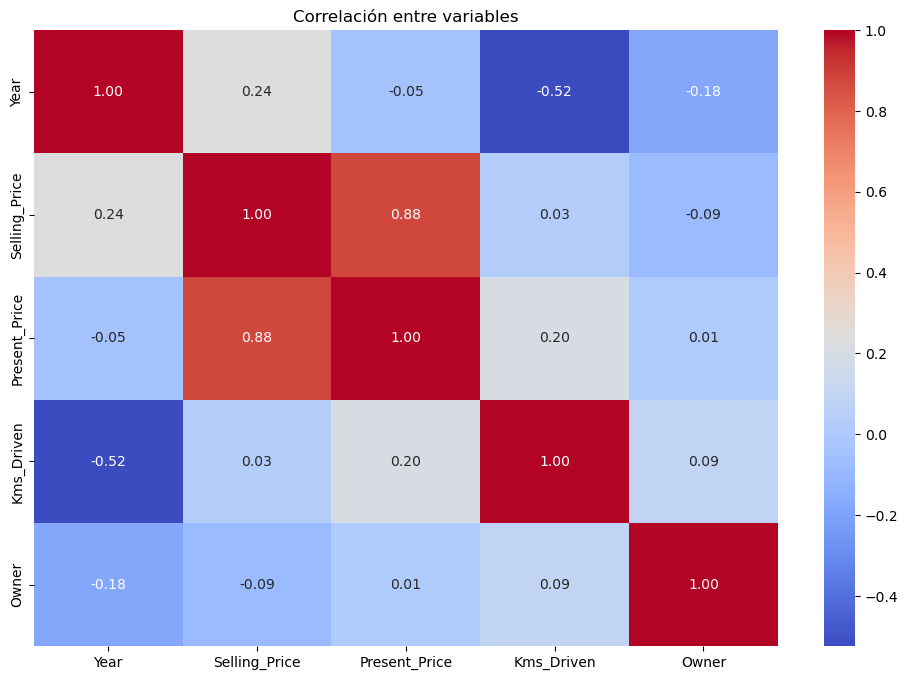

In [48]:
# Generar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()

In [30]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Cargar el dataset
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\car data.csv')

In [34]:
# Calcular Q1, Q3 e IQR para la columna 'Selling_Price'
Q1 = data['Selling_Price'].quantile(0.25)
Q3 = data['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1


In [36]:
# Definir límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [38]:
# Filtrar los datos eliminando los valores atípicos en 'Selling_Price'
data_no_outliers = data[(data['Selling_Price'] >= lower_bound) & (data['Selling_Price'] <= upper_bound)]

In [40]:
# Separar las características (X) y la variable objetivo (y)
X = data_no_outliers.drop('Selling_Price', axis=1)
y = data_no_outliers['Selling_Price']


In [42]:
# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Cargar el dataset
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\car data.csv')

# Convertir variables categóricas a numéricas
data = pd.get_dummies(data, drop_first=True)

# Calcular Q1, Q3 e IQR para la columna 'Selling_Price'
Q1 = data['Selling_Price'].quantile(0.25)
Q3 = data['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los valores atípicos en 'Selling_Price'
data_no_outliers = data[(data['Selling_Price'] >= lower_bound) & (data['Selling_Price'] <= upper_bound)]

# Separar las características (X) y la variable objetivo (y)
X = data_no_outliers.drop('Selling_Price', axis=1)
y = data_no_outliers['Selling_Price']

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE es la raíz cuadrada de MSE
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

# Calcular y mostrar las métricas como porcentajes
mae_percentage = (mae / y_test.mean()) * 100
mse_percentage = (mse / y_test.mean()) * 100
rmse_percentage = (rmse / y_test.mean()) * 100

print(f'Mean Absolute Error (MAE) como porcentaje: {mae_percentage:.2f}%')
print(f'Mean Squared Error (MSE) como porcentaje: {mse_percentage:.2f}%')
print(f'Root Mean Squared Error (RMSE) como porcentaje: {rmse_percentage:.2f}%')


Mean Absolute Error (MAE): 1.07
Mean Squared Error (MSE): 2.69
Root Mean Squared Error (RMSE): 1.64
R² Score: 0.71
Mean Absolute Error (MAE) como porcentaje: 26.10%
Mean Squared Error (MSE) como porcentaje: 65.59%
Root Mean Squared Error (RMSE) como porcentaje: 40.00%


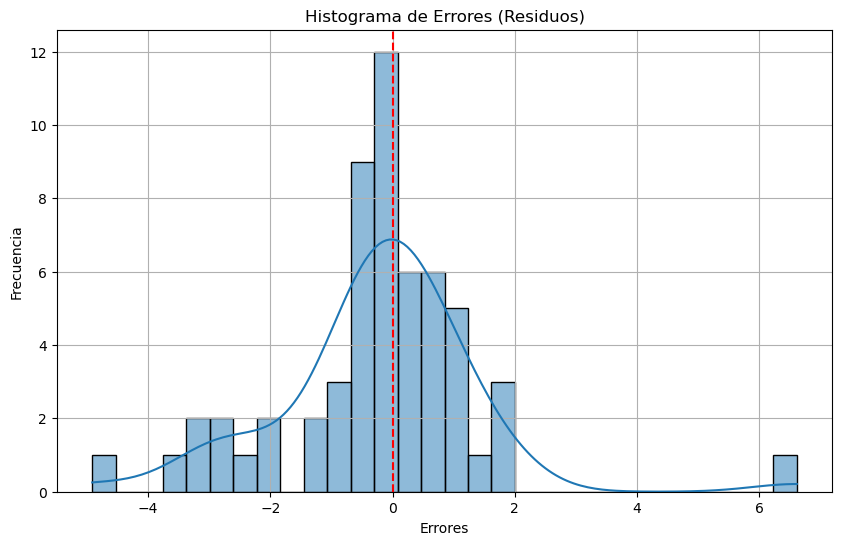

In [50]:

# Cargar el dataset
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\car data.csv')

# Convertir variables categóricas a numéricas
data = pd.get_dummies(data, drop_first=True)

# Calcular Q1, Q3 e IQR para la columna 'Selling_Price'
Q1 = data['Selling_Price'].quantile(0.25)
Q3 = data['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los valores atípicos en 'Selling_Price'
data_no_outliers = data[(data['Selling_Price'] >= lower_bound) & (data['Selling_Price'] <= upper_bound)]

# Separar las características (X) y la variable objetivo (y)
X = data_no_outliers.drop('Selling_Price', axis=1)
y = data_no_outliers['Selling_Price']

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)

# Calcular errores (residuos)
errors = y_test - y_pred

# Crear el histograma de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)  # Usamos KDE para una mejor visualización
plt.title('Histograma de Errores (Residuos)')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--')  # Línea vertical en 0 para referencia
plt.grid()
plt.show()


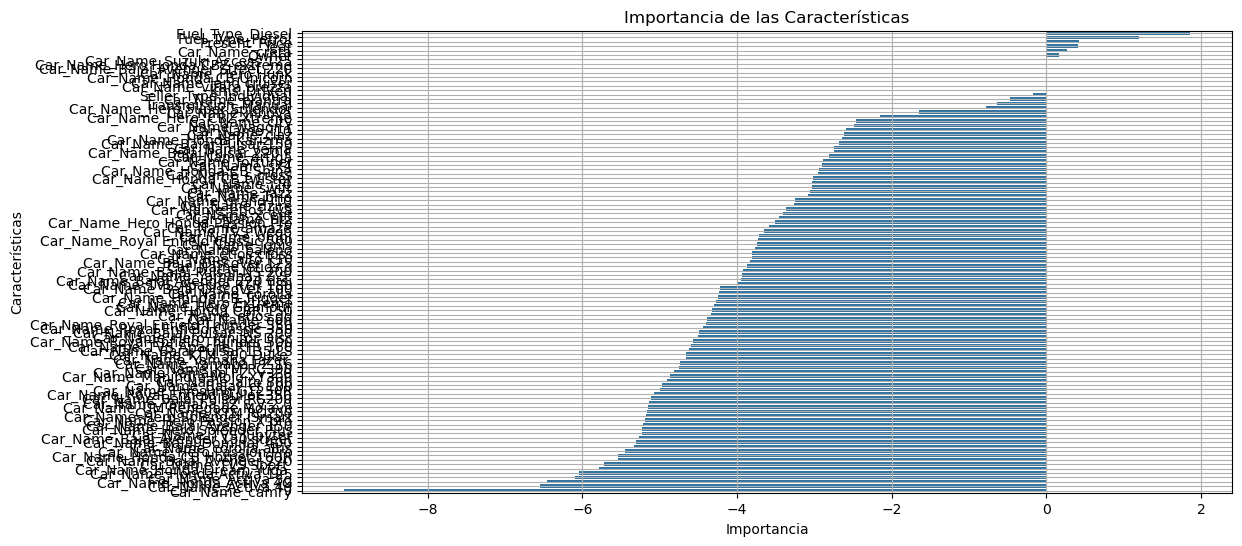

In [52]:
# Calcular la importancia de las características
importances = model.coef_
feature_names = X.columns

# Crear un DataFrame para las importancias
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Gráfica de Importancia de Características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.grid()
plt.show()

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Realizar predicciones
gb_predictions = gb_model.predict(X_test)

# Calcular métricas de desempeño
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_r2 = r2_score(y_test, gb_predictions)

# Imprimir métricas
print(f"Gradient Boosting - MAE: {gb_mae:.2f}")
print(f"Gradient Boosting - MSE: {gb_mse:.2f}")
print(f"Gradient Boosting - RMSE: {gb_rmse:.2f}")
print(f"Gradient Boosting - R² Score: {gb_r2:.2f}")


Gradient Boosting - MAE: 0.48
Gradient Boosting - MSE: 0.50
Gradient Boosting - RMSE: 0.70
Gradient Boosting - R² Score: 0.95


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 825.8 kB/s eta 0:02:32
   ---------------------------------------- 0.5/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 1.0/124.9 MB 6.4 MB/s eta 0:00:20
    --------------------------------------- 1.9/124.9 MB 9.2 MB/s eta 0:00:14
    --------------------------------------- 2.9/124.9 MB 11.7 MB/s eta 0:00:11
   - -------------------------------------- 3.9/124.9 MB 13.7 MB/s eta 0:00:09
   - -------------------------------------- 4.5/124.9 MB 13.2 MB/s eta 0:00:10
   - -------------------------------------- 5.1/124.9 MB 13.0 MB/s eta 0:00:10
   - -------------------------------------- 5.6/124.9 MB 12.7 MB/s eta 0:00:10


In [68]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



NameError: name 'xgb_predictions' is not defined

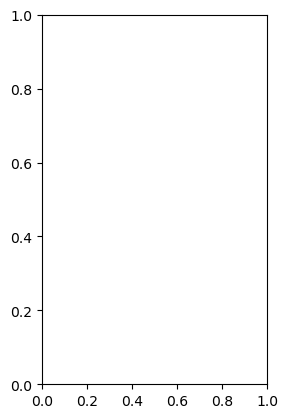

In [81]:
# Gráfico de Predicciones vs Valores Reales para XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Predicciones')

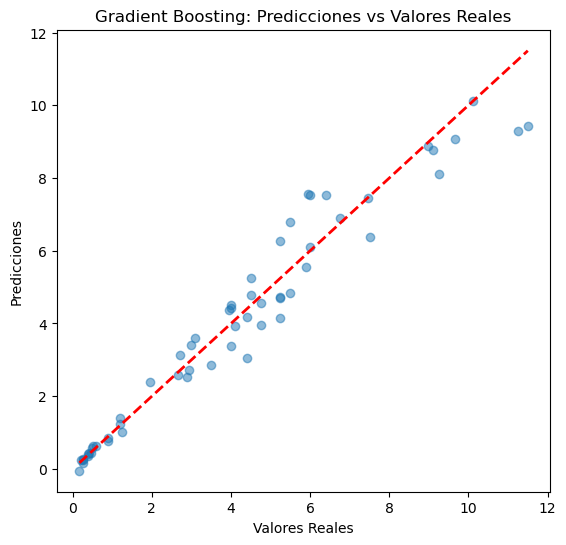

In [83]:
# Gráfico de Predicciones vs Valores Reales para Gradient Boosting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, gb_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Gradient Boosting: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

ModuleNotFoundError: No module named 'xgboost'